## Public Bike Parking in Dublin City

### *Import mandatory libraries*

In [1]:
# libraries for manipulating data
import pandas as pd
import numpy as np

# libraries for visualising data
import matplotlib.pyplot as plt
import seaborn as sns

# Suppress warning messages
import warnings
warnings.filterwarnings("ignore")

### 1. Data preparation

#### 1.1 Overview of original dataset

In [2]:
# Read original dataset and display the top 5 rows
bikeparking = pd.read_csv("dublin_bike_parking.csv", encoding = "latin1")
bikeparking.head()

,type_stands,X,Y,Easting,Northing,location_stand,no_stands
0,Sheffield Stand,-6.227261,53.34779261,318106.414,234502.185,East wall road outside the O2,4.0
1,Sheffield Stand,-6.265139,53.33424783,315620.753,232932.916,"Camden street lower, outside centra shop",1.0
2,Sheffield Stand,-6.249766,53.34494805,316615.570,234148.652,Marks lane,2.0
3,Sheffield Stand,-6.251052,53.34851312,316520.200,234543.281,"Custom House Quay, outside AIB International C...",1.0
4,Sheffield Stand,-6.242273,53.34296483,317119.980,233940.217,Pearce street outside garden area,3.0


In [3]:
# View the basic information
bikeparking.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 937 entries, 0 to 936
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   type_stands     937 non-null    object 
 1   X               688 non-null    float64
 2   Y               688 non-null    object 
 3   Easting         937 non-null    float64
 4   Northing        937 non-null    float64
 5   location_stand  890 non-null    object 
 6   no_stands       888 non-null    float64
dtypes: float64(4), object(3)
memory usage: 51.4+ KB


In [4]:
# Display the data type of each feature
bikeparking.dtypes

type_stands        object
X                 float64
Y                  object
Easting           float64
Northing          float64
location_stand     object
no_stands         float64
dtype: object

In [5]:
# Check shape of the data: numbers of rows and columns (i.e. numbers of observations and features)
bikeparking.shape

(937, 7)

In [6]:
# Check the unique values of type_stands: 7 types of bike parking stands showed
bikeparking["type_stands"].unique()

array(['Sheffield Stand', 'Railing', 'Stainless Steel Curved', 'Hoops',
       'Temporary Racks', 'Cargo bike stands',
       'Sheffield Stand +Cargo Stand'], dtype=object)

In [7]:
# Check if there are duplicates
bikeparking.duplicated().sum()

0

In [8]:
# Check the overall missing values in each column to gain insights for data cleaning
bikeparking.isnull().sum()

type_stands         0
X                 249
Y                 249
Easting             0
Northing            0
location_stand     47
no_stands          49
dtype: int64

### *Coordinate Reference System* 

- **Install pyproj for handling geographic data.**

In [9]:
pip install pyproj 

Note: you may need to restart the kernel to use updated packages.


In [10]:
# Create variables for the three coordinate reference systems found in data
from pyproj import CRS
crs_4326 = CRS.from_epsg(4326)
crs_29902 = CRS.from_epsg(29902)
crs_2157 = CRS.from_epsg(2157)

In [11]:
# a geographic coordinate system: longitude/latitude
crs_4326

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [12]:
# a projected coordinate system (easting/northing)
crs_29902

<Derived Projected CRS: EPSG:29902>
Name: TM65 / Irish Grid
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Ireland - onshore.
- bounds: (-10.56, 51.39, -5.93, 55.43)
Coordinate Operation:
- name: Irish Grid
- method: Transverse Mercator
Datum: TM65
- Ellipsoid: Airy Modified 1849
- Prime Meridian: Greenwich

In [13]:
# a projected coordinate system (itm x/itm y)
crs_2157

<Derived Projected CRS: EPSG:2157>
Name: IRENET95 / Irish Transverse Mercator
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Ireland - onshore. United Kingdom (UK) - Northern Ireland (Ulster) - onshore.
- bounds: (-10.56, 51.39, -5.34, 55.43)
Coordinate Operation:
- name: Irish Transverse Mercator
- method: Transverse Mercator
Datum: IRENET95
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

#### 1.2 Data cleaning

In [14]:
# Observe the unique values of feature X in detail and some problems were found
bikeparking["X"].unique()

array([-6.22726053e+00, -6.26513869e+00, -6.24976561e+00, -6.25105172e+00,
       -6.24227285e+00, -6.26208097e+00, -6.25176385e+00, -6.26816019e+00,
       -6.26436353e+00, -6.26250476e+00, -6.27133861e+00, -6.24598637e+00,
       -6.26279712e+00, -6.25826081e+00, -6.26447484e+00, -6.25979438e+00,
       -6.26552224e+00, -6.26428306e+00, -6.25272408e+00, -6.26881465e+00,
       -6.25044554e+00, -6.25876308e+00, -6.25742063e+00, -6.24954298e+00,
       -6.25900313e+00, -6.26837343e+00, -6.25231504e+00, -6.26864299e+00,
       -6.26110598e+00, -6.25708803e+00, -6.26149356e+00, -6.25499457e+00,
       -6.22892216e+00, -6.25869334e+00, -6.26347706e+00, -6.26712218e+00,
       -6.26449227e+00, -6.26317933e+00, -6.26607746e+00, -6.27217278e+00,
       -6.27538338e+00, -6.24877051e+00, -6.24781027e+00, -6.25508174e+00,
       -6.24988094e+00, -6.24509454e+00, -6.26622498e+00, -6.26945972e+00,
       -6.26893401e+00, -6.25719801e+00, -6.26480877e+00, -6.26795232e+00,
       -6.26986876e+00, -

In [15]:
# Observe the unique values of feature Y in detail and same problems were found
# The values are string type
bikeparking["Y"].unique()

array(['53.34779261', '53.33424783', '53.34494805', '53.34851312',
       '53.34296483', '53.34817688', '53.35182974', '53.35686542',
       '53.35398625', '53.34211451', '53.35055212', '53.33485887',
       '53.33769129', '53.35392471', '53.3509772', '53.35342112',
       '53.33630513', '53.34393043', '53.33299531', '53.34846989',
       '53.341293', '53.33366002', '53.34867644', '53.35221799',
       '53.35921696', '53.35274391', '53.35165203', '53.35275832',
       '53.35264945', '53.35410392', '53.33916468', '53.34695679',
       '53.34845548', '53.35708473', '53.34307452', '53.34103437',
       '53.34339079', '53.34308013', '53.3471065', '53.34126417',
       '53.34595443', '53.33677519', '53.33588071', '53.34158766',
       '53.34336116', '53.34337317', '53.33866101', '53.35013744',
       '53.35202907', '53.35419437', '53.3508299', '53.348618',
       '53.35896725', '53.34900307', '53.34960348', '53.34371105',
       '53.3400639', '53.34383275', '53.34522827', '53.34989648',
   

In [16]:
# Get some understandings of location_stand to make further decision
print(len(bikeparking["location_stand"].unique()))
print(bikeparking["location_stand"].duplicated().sum())
print(bikeparking["location_stand"].isnull().sum())

858
79
47


In [17]:
# Drop the three columns below based on adequate analysis 
# Create a new dataframe bp for further processing
bp = bikeparking.drop(columns = {"X", "Y", "location_stand"})
bp.head()

,type_stands,Easting,Northing,no_stands
0,Sheffield Stand,318106.414,234502.185,4.0
1,Sheffield Stand,315620.753,232932.916,1.0
2,Sheffield Stand,316615.570,234148.652,2.0
3,Sheffield Stand,316520.200,234543.281,1.0
4,Sheffield Stand,317119.980,233940.217,3.0


In [18]:
# Check shape after
bp.shape

(937, 4)

In [19]:
# Check duplicates
bp.duplicated().sum()

1

- ***Interestingly, one duplicate is then detected after dropping some columns. Further explaination is given in the report.***

In [20]:
# Check what is duplicating and find reason
duplicate_bool = bp.duplicated(subset = ["type_stands", "Easting", "Northing", "no_stands"], keep = "first")
duplicate = bp.loc[duplicate_bool == True]
duplicate

,type_stands,Easting,Northing,no_stands
922,Sheffield Stand,312150.0,233511.0,5.0


In [21]:
# Drop the duplicate
bp.drop_duplicates(keep = "first", inplace = True)

In [22]:
# Convert projected coordinates (easting/northing) into geographic coordinates (longtitude/latitude)
# Add two new columns to dataframe bp with the converted coordinate values
# Print and show the updated dataset
from pyproj import Transformer
easting = bp["Easting"].values
northing = bp["Northing"].values
proj = Transformer.from_crs(crs_29902, crs_4326, always_xy=True)
def coordinate_convert(bp):
    long, lat = proj.transform(easting, northing)
    bp["longitude"] = long
    bp["latitude"] = lat
    return bp
print(coordinate_convert(bp))

         type_stands     Easting    Northing  no_stands  longitude   latitude
0    Sheffield Stand  318106.414  234502.185        4.0  -6.227256  53.347793
1    Sheffield Stand  315620.753  232932.916        1.0  -6.265134  53.334248
2    Sheffield Stand  316615.570  234148.652        2.0  -6.249761  53.344949
3    Sheffield Stand  316520.200  234543.281        1.0  -6.251047  53.348514
4    Sheffield Stand  317119.980  233940.217        3.0  -6.242268  53.342965
..               ...         ...         ...        ...        ...        ...
932  Sheffield Stand  316302.000  233262.000        4.0  -6.254792  53.337055
933  Sheffield Stand  315695.000  238310.000       10.0  -6.262055  53.382523
934  Sheffield Stand  314313.000  234658.000        4.0  -6.284133  53.350025
935  Sheffield Stand  309975.000  233713.000        5.0  -6.349573  53.342457
936  Sheffield Stand  313622.000  233003.000        5.0  -6.295098  53.335310

[936 rows x 6 columns]


#### 1.3 Data rearranging

In [23]:
# Create a new dataframe bp1 with the last generated dataset for rearranging and further preparation
bp1 = coordinate_convert(bp)
bp1.head()

,type_stands,Easting,Northing,no_stands,longitude,latitude
0,Sheffield Stand,318106.414,234502.185,4.0,-6.227256,53.347793
1,Sheffield Stand,315620.753,232932.916,1.0,-6.265134,53.334248
2,Sheffield Stand,316615.570,234148.652,2.0,-6.249761,53.344949
3,Sheffield Stand,316520.200,234543.281,1.0,-6.251047,53.348514
4,Sheffield Stand,317119.980,233940.217,3.0,-6.242268,53.342965


In [24]:
# Rename the columns and alter the order
bp1.columns = ["stand_type", "easting", "northing","stand_numbers", "long", "lat"]
new_order = [0, 1, 2, -2, -1, 3]
bp1 = bp1[bp1.columns[new_order]]
bp1.head()

,stand_type,easting,northing,long,lat,stand_numbers
0,Sheffield Stand,318106.414,234502.185,-6.227256,53.347793,4.0
1,Sheffield Stand,315620.753,232932.916,-6.265134,53.334248,1.0
2,Sheffield Stand,316615.570,234148.652,-6.249761,53.344949,2.0
3,Sheffield Stand,316520.200,234543.281,-6.251047,53.348514,1.0
4,Sheffield Stand,317119.980,233940.217,-6.242268,53.342965,3.0


In [25]:
# Check again the information of rearranged dataframe bp1
bp1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 936 entries, 0 to 936
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   stand_type     936 non-null    object 
 1   easting        936 non-null    float64
 2   northing       936 non-null    float64
 3   long           936 non-null    float64
 4   lat            936 non-null    float64
 5   stand_numbers  887 non-null    float64
dtypes: float64(5), object(1)
memory usage: 51.2+ KB


In [26]:
# Check the shape of bp1
bp1.shape

(936, 6)

#### 1.3.1 Missing value

In [27]:
# Check missing values in bp1
bp1.isnull().sum()

stand_type        0
easting           0
northing          0
long              0
lat               0
stand_numbers    49
dtype: int64

In [28]:
# overview of the unique values in missing value column
bp1["stand_numbers"].unique()

array([  4.,   1.,   2.,   3.,   5.,   6.,  10.,   8.,   7.,   9.,  13.,
        12.,  11.,  20.,  15.,  18.,  17.,  25.,  14.,  16.,  34.,  42.,
       166.,  nan,  40.,  27.,   0.])

In [29]:
# detailed value counts of the missing value column
bp1["stand_numbers"].value_counts(dropna = False)

5.0      242
4.0      172
3.0      110
10.0      74
6.0       63
2.0       57
8.0       50
NaN       49
7.0       42
9.0       22
11.0      15
12.0      10
1.0        5
13.0       4
18.0       3
14.0       3
16.0       3
15.0       2
25.0       2
166.0      1
27.0       1
40.0       1
20.0       1
42.0       1
34.0       1
17.0       1
0.0        1
Name: stand_numbers, dtype: int64

In [30]:
# Spot one 0 value in counts and replace with nan value after critical thinking
bp1["stand_numbers"].replace(0, np.nan, inplace = True)
bp1.isnull().sum()

stand_type        0
easting           0
northing          0
long              0
lat               0
stand_numbers    50
dtype: int64

In [31]:
# Check again the value counts and 0 value has disappeared
bp1["stand_numbers"].value_counts(dropna = False)

5.0      242
4.0      172
3.0      110
10.0      74
6.0       63
2.0       57
8.0       50
NaN       50
7.0       42
9.0       22
11.0      15
12.0      10
1.0        5
13.0       4
18.0       3
14.0       3
16.0       3
15.0       2
25.0       2
166.0      1
40.0       1
20.0       1
42.0       1
34.0       1
17.0       1
27.0       1
Name: stand_numbers, dtype: int64

In [32]:
# percentage of missing values in whole dataset
bp1.isnull().sum()/len(bp1)

stand_type       0.000000
easting          0.000000
northing         0.000000
long             0.000000
lat              0.000000
stand_numbers    0.053419
dtype: float64

- ***Fill missing values using K-nearest neighbors imputation method*** 

In [33]:
# Fill missing values with KNN method
from sklearn.impute import KNNImputer
nan = np.nan
fill_missing = bp1.iloc[:, [1, 2, 3, 4, 5]].values
imputer = KNNImputer(n_neighbors = 5, weights = "uniform")
imputer.fit(fill_missing)
imputed = imputer.transform(fill_missing)
list(imputed)

[array([ 3.18106414e+05,  2.34502185e+05, -6.22725578e+00,  5.33477933e+01,
         4.00000000e+00]),
 array([ 3.15620753e+05,  2.32932916e+05, -6.26513379e+00,  5.33342484e+01,
         1.00000000e+00]),
 array([ 3.16615570e+05,  2.34148652e+05, -6.24976081e+00,  5.33449487e+01,
         2.00000000e+00]),
 array([ 3.16520200e+05,  2.34543281e+05, -6.25104695e+00,  5.33485138e+01,
         1.00000000e+00]),
 array([ 3.17119980e+05,  2.33940217e+05, -6.24226805e+00,  5.33429655e+01,
         3.00000000e+00]),
 array([ 3.15786687e+05,  2.34487924e+05, -6.26207618e+00,  5.33481775e+01,
         2.00000000e+00]),
 array([ 3.16463739e+05,  2.34911200e+05, -6.25175910e+00,  5.33518304e+01,
         3.00000000e+00]),
 array([ 3.15358411e+05,  2.35444966e+05, -6.26815545e+00,  5.33568661e+01,
         3.00000000e+00]),
 array([ 3.15618970e+05,  2.35130706e+05, -6.26435877e+00,  5.33539869e+01,
         4.00000000e+00]),
 array([ 3.15774891e+05,  2.33812603e+05, -6.26249993e+00,  5.33421151e+0

In [34]:
# Create an array to form a new dataframe bp2 after missing values are filled
array = np.array(imputed)
bp2 = pd.DataFrame(array, columns = ["easting", "northing", "long", "lat", "full_stand_numbers"])
bp2.head()

,easting,northing,long,lat,full_stand_numbers
0,318106.414,234502.185,-6.227256,53.347793,4.0
1,315620.753,232932.916,-6.265134,53.334248,1.0
2,316615.570,234148.652,-6.249761,53.344949,2.0
3,316520.200,234543.281,-6.251047,53.348514,1.0
4,317119.980,233940.217,-6.242268,53.342965,3.0


In [35]:
# overview of the full_stand_numbers
# filled numbers are not discrete since the original datatype is float
list(bp2["full_stand_numbers"])

[4.0,
 1.0,
 2.0,
 1.0,
 3.0,
 2.0,
 3.0,
 3.0,
 4.0,
 2.0,
 2.0,
 2.0,
 5.0,
 2.0,
 2.0,
 2.0,
 2.0,
 6.0,
 2.0,
 1.0,
 4.0,
 4.0,
 3.0,
 3.0,
 2.0,
 2.0,
 3.0,
 2.0,
 2.0,
 2.0,
 5.0,
 4.0,
 6.0,
 5.0,
 1.0,
 6.0,
 4.0,
 2.0,
 2.0,
 2.0,
 4.0,
 2.0,
 4.0,
 2.0,
 3.0,
 2.0,
 5.0,
 4.0,
 4.0,
 4.0,
 4.0,
 2.0,
 2.0,
 6.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 3.0,
 4.0,
 3.0,
 2.0,
 5.0,
 10.0,
 3.0,
 8.0,
 5.0,
 3.0,
 8.0,
 6.0,
 4.0,
 4.0,
 4.0,
 8.0,
 4.0,
 2.0,
 5.0,
 10.0,
 5.0,
 4.0,
 2.0,
 3.0,
 2.0,
 4.0,
 4.0,
 3.0,
 3.0,
 3.0,
 4.0,
 6.0,
 3.0,
 2.0,
 4.0,
 5.0,
 7.0,
 5.0,
 3.0,
 3.0,
 4.0,
 3.0,
 3.0,
 4.0,
 4.0,
 8.0,
 3.0,
 2.0,
 6.0,
 4.0,
 6.0,
 3.0,
 2.0,
 5.0,
 4.0,
 4.0,
 4.0,
 4.0,
 3.0,
 5.0,
 4.0,
 5.0,
 4.0,
 4.0,
 7.0,
 4.0,
 6.0,
 4.0,
 10.0,
 5.0,
 2.0,
 5.0,
 4.0,
 9.0,
 5.0,
 8.0,
 6.0,
 4.0,
 4.0,
 4.0,
 3.0,
 3.0,
 4.0,
 13.0,
 5.0,
 4.0,
 4.0,
 10.0,
 5.0,
 4.0,
 6.0,
 5.0,
 2.0,
 4.0,
 12.0,
 3.0,
 7.0,
 5.0,
 7.0,
 4.0,
 7.0,
 4.0,
 4.0,
 7.0,
 11.0,
 8.0,
 20

In [36]:
# Round the numbers to 0 decimal
bp2 = bp2.round({"full_stand_numbers": 0})
list(bp2["full_stand_numbers"])

[4.0,
 1.0,
 2.0,
 1.0,
 3.0,
 2.0,
 3.0,
 3.0,
 4.0,
 2.0,
 2.0,
 2.0,
 5.0,
 2.0,
 2.0,
 2.0,
 2.0,
 6.0,
 2.0,
 1.0,
 4.0,
 4.0,
 3.0,
 3.0,
 2.0,
 2.0,
 3.0,
 2.0,
 2.0,
 2.0,
 5.0,
 4.0,
 6.0,
 5.0,
 1.0,
 6.0,
 4.0,
 2.0,
 2.0,
 2.0,
 4.0,
 2.0,
 4.0,
 2.0,
 3.0,
 2.0,
 5.0,
 4.0,
 4.0,
 4.0,
 4.0,
 2.0,
 2.0,
 6.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 3.0,
 4.0,
 3.0,
 2.0,
 5.0,
 10.0,
 3.0,
 8.0,
 5.0,
 3.0,
 8.0,
 6.0,
 4.0,
 4.0,
 4.0,
 8.0,
 4.0,
 2.0,
 5.0,
 10.0,
 5.0,
 4.0,
 2.0,
 3.0,
 2.0,
 4.0,
 4.0,
 3.0,
 3.0,
 3.0,
 4.0,
 6.0,
 3.0,
 2.0,
 4.0,
 5.0,
 7.0,
 5.0,
 3.0,
 3.0,
 4.0,
 3.0,
 3.0,
 4.0,
 4.0,
 8.0,
 3.0,
 2.0,
 6.0,
 4.0,
 6.0,
 3.0,
 2.0,
 5.0,
 4.0,
 4.0,
 4.0,
 4.0,
 3.0,
 5.0,
 4.0,
 5.0,
 4.0,
 4.0,
 7.0,
 4.0,
 6.0,
 4.0,
 10.0,
 5.0,
 2.0,
 5.0,
 4.0,
 9.0,
 5.0,
 8.0,
 6.0,
 4.0,
 4.0,
 4.0,
 3.0,
 3.0,
 4.0,
 13.0,
 5.0,
 4.0,
 4.0,
 10.0,
 5.0,
 4.0,
 6.0,
 5.0,
 2.0,
 4.0,
 12.0,
 3.0,
 7.0,
 5.0,
 7.0,
 4.0,
 7.0,
 4.0,
 4.0,
 7.0,
 11.0,
 8.0,
 20

In [37]:
# Change the datatype from float to integer
bp2["full_stand_numbers"] = bp2["full_stand_numbers"].astype(int)
bp2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 936 entries, 0 to 935
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   easting             936 non-null    float64
 1   northing            936 non-null    float64
 2   long                936 non-null    float64
 3   lat                 936 non-null    float64
 4   full_stand_numbers  936 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 33.0 KB


In [38]:
# Check the shape of bp2
bp2.shape

(936, 5)

#### 1.5 Finalise the dataset

In [39]:
# Add stand_type column to bp2 from bp1
bp2["stand_type"] = bp1["stand_type"].values
bp2

,easting,northing,long,lat,full_stand_numbers,stand_type
0,318106.414,234502.185,-6.227256,53.347793,4,Sheffield Stand
1,315620.753,232932.916,-6.265134,53.334248,1,Sheffield Stand
2,316615.570,234148.652,-6.249761,53.344949,2,Sheffield Stand
3,316520.200,234543.281,-6.251047,53.348514,1,Sheffield Stand
4,317119.980,233940.217,-6.242268,53.342965,3,Sheffield Stand
...,...,...,...,...,...,...
931,316302.000,233262.000,-6.254792,53.337055,4,Sheffield Stand
932,315695.000,238310.000,-6.262055,53.382523,10,Sheffield Stand
933,314313.000,234658.000,-6.284133,53.350025,4,Sheffield Stand
934,309975.000,233713.000,-6.349573,53.342457,5,Sheffield Stand


In [40]:
# Rearrange bp2 and create a final dataframe
bp2.rename(columns = {"full_stand_numbers":"stand_numbers"}, inplace=True)
bp_final = bp2[bp2.columns[[-1, 0, 1, 2, 3, 4]]]
bp_final

,stand_type,easting,northing,long,lat,stand_numbers
0,Sheffield Stand,318106.414,234502.185,-6.227256,53.347793,4
1,Sheffield Stand,315620.753,232932.916,-6.265134,53.334248,1
2,Sheffield Stand,316615.570,234148.652,-6.249761,53.344949,2
3,Sheffield Stand,316520.200,234543.281,-6.251047,53.348514,1
4,Sheffield Stand,317119.980,233940.217,-6.242268,53.342965,3
...,...,...,...,...,...,...
931,Sheffield Stand,316302.000,233262.000,-6.254792,53.337055,4
932,Sheffield Stand,315695.000,238310.000,-6.262055,53.382523,10
933,Sheffield Stand,314313.000,234658.000,-6.284133,53.350025,4
934,Sheffield Stand,309975.000,233713.000,-6.349573,53.342457,5


In [41]:
# Write this dataset into default filepath (for future reference)
bp_final.to_csv("dublin_bike_parking_stands_final.csv", index = None, header = True)

- **Install geopy to reverse coordinates into addresses/locations for interactive visualisation after.**

In [42]:
pip install geopy

Note: you may need to restart the kernel to use updated packages.


- **Note: The following code takes time to run. Jump the following two codes if you may.**
- ***A more convenient method is provided below.***

In [43]:
# Retrieve the addresses of each point from their geographic coordinates
# Import geopy to reverse to locations

#from geopy.extra.rate_limiter import RateLimiter
#from geopy.geocoders import Nominatim
#bp_final["geom"] = bp_final["lat"].map(str) + ", " + bp_final["long"].map(str)
#locator = Nominatim(user_agent = "openmapquest", timeout = 10)
#reverse = RateLimiter(locator.reverse, min_delay_seconds = 0.001)
#bp_final["stand_location"] = bp_final["geom"].apply(reverse)
#bp_final

In [44]:
# Write this dataset into default filepath (for future reference and convenience)
# bp_final.to_csv("dublin_bike_parking_stands_with_addresses.csv", index = None, header = True)

In [45]:
# Check missing values lastly
bp_final.isnull().sum()

stand_type       0
easting          0
northing         0
long             0
lat              0
stand_numbers    0
dtype: int64

In [46]:
# Check shape lastly
bp_final.shape

(936, 6)

In [47]:
# Check basic info lastly
bp_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 936 entries, 0 to 935
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   stand_type     936 non-null    object 
 1   easting        936 non-null    float64
 2   northing       936 non-null    float64
 3   long           936 non-null    float64
 4   lat            936 non-null    float64
 5   stand_numbers  936 non-null    int32  
dtypes: float64(4), int32(1), object(1)
memory usage: 40.3+ KB


#### 1.6 Geospatial data

- **Install geopandas for processing geospatial data files.**

In [48]:
pip install geopandas

Note: you may need to restart the kernel to use updated packages.


In [49]:
# Import library
import geopandas as gpd

# Read shapefile of the 5 committee areas in Dublin (downloaded online)
dublin_5areas = gpd.read_file("DCC_5CommitteeAreas_2019_2157_.shp")
dublin_5areas.head()

,Name,geometry
0,NORTH WEST,"POLYGON Z ((-6.30628 53.40145 0.00000, -6.3058..."
1,NORTH CENTRAL,"POLYGON Z ((-6.14532 53.38582 0.00000, -6.1453..."
2,SOUTH EAST,"POLYGON Z ((-6.27841 53.32989 0.00000, -6.2782..."
3,SOUTH CENTRAL,"POLYGON Z ((-6.27203 53.34466 0.00000, -6.2720..."
4,CENTRAL,"POLYGON Z ((-6.29182 53.34741 0.00000, -6.2918..."


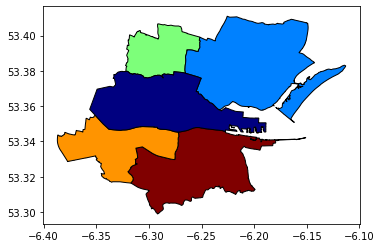

In [50]:
# Plot the 5 committee areas of Dublin
dublin_5areas.plot(column = "Name", cmap = "jet", edgecolor = "black");

In [51]:
# Create a geodataframe based on a dataset prepared above
bike = pd.read_csv("dublin_bike_parking_stands_final.csv")
bp_geometry = gpd.GeoDataFrame(bike, geometry = gpd.points_from_xy(bike.long, bike.lat))
bp_geometry.head()

,stand_type,easting,northing,long,lat,stand_numbers,geometry
0,Sheffield Stand,318106.414,234502.185,-6.227256,53.347793,4,POINT (-6.22726 53.34779)
1,Sheffield Stand,315620.753,232932.916,-6.265134,53.334248,1,POINT (-6.26513 53.33425)
2,Sheffield Stand,316615.570,234148.652,-6.249761,53.344949,2,POINT (-6.24976 53.34495)
3,Sheffield Stand,316520.200,234543.281,-6.251047,53.348514,1,POINT (-6.25105 53.34851)
4,Sheffield Stand,317119.980,233940.217,-6.242268,53.342965,3,POINT (-6.24227 53.34297)


In [52]:
# Join the two geodataframes
area_geometry = bp_geometry.sjoin(dublin_5areas)
area_geometry.head()  

,stand_type,easting,northing,long,lat,stand_numbers,geometry,index_right,Name
0,Sheffield Stand,318106.414,234502.185,-6.227256,53.347793,4,POINT (-6.22726 53.34779),4,CENTRAL
3,Sheffield Stand,316520.200,234543.281,-6.251047,53.348514,1,POINT (-6.25105 53.34851),4,CENTRAL
5,Sheffield Stand,315786.687,234487.924,-6.262076,53.348178,2,POINT (-6.26208 53.34818),4,CENTRAL
6,Sheffield Stand,316463.739,234911.200,-6.251759,53.351830,3,POINT (-6.25176 53.35183),4,CENTRAL
7,Sheffield Stand,315358.411,235444.966,-6.268155,53.356866,3,POINT (-6.26816 53.35687),4,CENTRAL


In [53]:
# Rearrange the joined geodataframe
area_geometry.drop(columns = {"easting", "northing", "index_right"}, inplace = True)
area_geometry.rename(columns = {"Name":"area"}, inplace=True)
area_geometry.head()

,stand_type,long,lat,stand_numbers,geometry,area
0,Sheffield Stand,-6.227256,53.347793,4,POINT (-6.22726 53.34779),CENTRAL
3,Sheffield Stand,-6.251047,53.348514,1,POINT (-6.25105 53.34851),CENTRAL
5,Sheffield Stand,-6.262076,53.348178,2,POINT (-6.26208 53.34818),CENTRAL
6,Sheffield Stand,-6.251759,53.351830,3,POINT (-6.25176 53.35183),CENTRAL
7,Sheffield Stand,-6.268155,53.356866,3,POINT (-6.26816 53.35687),CENTRAL


In [54]:
# Write into a geojson file for future reference
area_geometry.to_file("dublin_bike_parking_stands.geojson", driver = "GeoJSON")  

### References

- <p> https://colorbrewer2.org/#type=qualitative&scheme=Paired&n=7 <p>
- <p> https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.poisson.html?highlight=poisson#scipy.stats.poisson <p>
- <p> https://fontawesome.com/icons/bicycle?s=solid&f=classic <p>
- <p> https://github.com/PacktPublishing/Machine-Learning-with-Real-World-Projects <p>
- <p> https://geopandas.org/en/stable/index.html <p>
- <p> https://machinelearningmastery.com/knn-imputation-for-missing-values-in-machine-learning/ <p>
- <p> https://matplotlib.org/stable/index.html <p>
- <p> https://pandas.pydata.org/docs/index.html <p>
- <p> https://pyproj4.github.io/pyproj/stable/index.html <p>
- <p> https://python-visualization.github.io/folium/quickstart.html#Getting-Started <p>
- <p> https://scikit-learn.org/stable/ <p>
- <p> https://stackoverflow.com/questions/71287607/how-to-make-a-normal-distribution-graph-from-data-frame-in-python <p>
- <p> https://towardsdatascience.com/reverse-geocoding-in-python-a915acf29eb6 <p>
- <p> https://www.datacamp.com/community/tutorials/introduction-machine-learning-python <p>
- <p> https://www.kaggle.com/code/dabaker/fancy-folium <p>
- <p> Peng, J. et al. (2021) ‘DataPrep.EDA: Task-Centric Exploratory Data Analysis for Statistical Modeling in Python’, in Proceedings of the 2021 International Conference on Management of Data. New York, NY, USA: Association for Computing Machinery (SIGMOD ’21), pp. 2271–2280. Available at: https://doi.org/10.1145/3448016.3457330. <p>